In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
dataset= pd.read_csv(r'D:\DATASETS\Glacier_land_ice102\glacier_land_ice102.csv')

In [3]:
dataset.head()

,Unnamed: 0,LST,Unnamed: 0.1,X_Coor,Y_Coor,band1,band2,band3,band4,band5,...,band9,band10,POINTID,nbr,ndbi,ndmi,ndsi,ndvi,ndwi,label
0,0,23.794017,0,629719.8862,3959150.278,1449,1556,1750,1784,1851,...,2704,2719,1,-1,-1,-1,-1,-1,-1,0
1,1,23.794017,1,629679.8862,3959140.278,1269,1445,1598,1585,1718,...,2592,2311,2,-1,-1,-1,-1,-1,-1,0
2,2,21.481792,2,629689.8862,3959140.278,1286,1447,1562,1670,1794,...,2672,2427,3,-1,-1,-1,-1,-1,-1,0
3,3,21.481792,3,629699.8862,3959140.278,1310,1445,1601,1734,1839,...,2719,2549,4,-1,-1,-1,-1,-1,-1,0
4,4,21.481792,4,629709.8862,3959140.278,1365,1507,1703,1779,1854,...,2733,2674,5,-1,-1,-1,-1,-1,-1,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0    1048575 non-null  int64  
 1   LST           972950 non-null   float64
 2   Unnamed: 0.1  1048575 non-null  int64  
 3   X_Coor        1048575 non-null  float64
 4   Y_Coor        1048575 non-null  float64
 5   band1         1048575 non-null  int64  
 6   band2         1048575 non-null  int64  
 7   band3         1048575 non-null  int64  
 8   band4         1048575 non-null  int64  
 9   band5         1048575 non-null  int64  
 10  band6         1048575 non-null  int64  
 11  band7         1048575 non-null  int64  
 12  band8         1048575 non-null  int64  
 13  band9         1048575 non-null  int64  
 14  band10        1048575 non-null  int64  
 15  POINTID       1048575 non-null  int64  
 16  nbr           1048575 non-null  int64  
 17  ndbi          1048575 non-n

In [5]:
dataset.isna().any()

Unnamed: 0      False
LST              True
Unnamed: 0.1    False
X_Coor          False
Y_Coor          False
band1           False
band2           False
band3           False
band4           False
band5           False
band6           False
band7           False
band8           False
band9           False
band10          False
POINTID         False
nbr             False
ndbi            False
ndmi            False
ndsi            False
ndvi            False
ndwi            False
label           False
dtype: bool

In [6]:
dataset['LST'].fillna(value=dataset['LST'].median(),inplace=True)   

In [7]:
dataset.isna().any()

Unnamed: 0      False
LST             False
Unnamed: 0.1    False
X_Coor          False
Y_Coor          False
band1           False
band2           False
band3           False
band4           False
band5           False
band6           False
band7           False
band8           False
band9           False
band10          False
POINTID         False
nbr             False
ndbi            False
ndmi            False
ndsi            False
ndvi            False
ndwi            False
label           False
dtype: bool

In [8]:
dataset.drop(['Unnamed: 0','Unnamed: 0.1','nbr','ndbi','ndmi','ndsi','ndvi','ndwi','POINTID'],axis=1,inplace=True)

In [9]:
dataset.head()

,LST,X_Coor,Y_Coor,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,label
0,23.794017,629719.8862,3959150.278,1449,1556,1750,1784,1851,1934,1863,1918,2704,2719,0
1,23.794017,629679.8862,3959140.278,1269,1445,1598,1585,1718,1788,1856,1826,2592,2311,0
2,21.481792,629689.8862,3959140.278,1286,1447,1562,1670,1794,1882,1865,1875,2672,2427,0
3,21.481792,629699.8862,3959140.278,1310,1445,1601,1734,1839,1936,1892,1907,2719,2549,0
4,21.481792,629709.8862,3959140.278,1365,1507,1703,1779,1854,1951,1932,1925,2733,2674,0


In [10]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [11]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [13]:
dataset.columns

Index(['LST', 'X_Coor', 'Y_Coor', 'band1', 'band2', 'band3', 'band4', 'band5',
       'band6', 'band7', 'band8', 'band9', 'band10', 'label'],
      dtype='object')

In [14]:
from keras.layers import Dense
import keras
import matplotlib.pyplot as plt
plt.scatter(X_train[:100000,0], X_train[:100000,1], s=1,c=y_train[:100000])
plt.show()


In [ ]:
model =keras.Sequential()
model.add(Dense (13,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='relu'))

In [ ]:
model.compile(loss='mse',optimizer='adam',metrics=["accuracy"])
checkpoint=keras.callbacks.ModelCheckpoint(filepath='weights.h5',verbose=1,save_best_only=True)
history=model.fit(X_train[:25000,:],y_train[:25000] , epochs=30,batch_size=500,verbose=0,validation_split=0.2)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (500, 13)                 182       
                                                                 
 dense_4 (Dense)             (500, 20)                 280       
                                                                 
 dense_5 (Dense)             (500, 1)                  21        
                                                                 
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_predict=model.predict(X_test[:1000,:])
print(model.evaluate(X_test[:1000,:],y_test[:1000]))


32/32 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9930
[0.0077402349561452866, 0.9929999709129333]


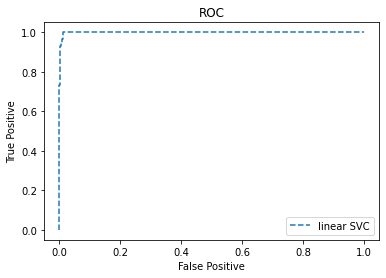

In [ ]:
#calculationg ROC and area under ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
linearauc = roc_auc_score(y_test[:1000], y_predict)
linearfpr, lineartpr, threadshot = roc_curve(y_test[:1000], y_predict) #linearfpr holds the False Positive rate, lineartpr holds True Positive rate

#plotting the ROC curve
plt.plot(linearfpr, lineartpr,linestyle='--', label='linear SVC')
plt.title('ROC')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()
plt.show()


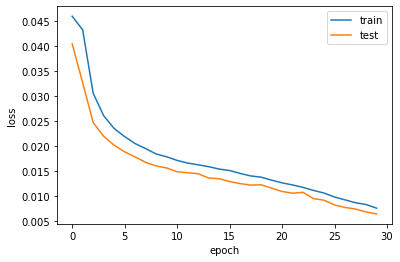

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

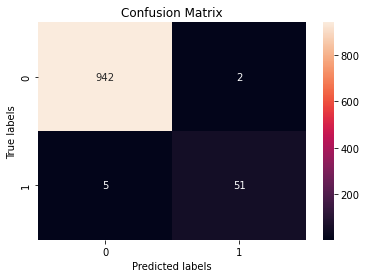

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot()
cm = confusion_matrix(y_test[:1000], np.where(y_predict > 0.5, 1,0) )
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
